## Import Libraries
Let's import some of the libraries that are needed for building our Models.

In [50]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

Let's import the data file, and try to get a sneak peak of the view of the data.

In [106]:
# Reading Training Data
heart_df=pd.read_csv("C:\\Users\\Ankita & Subhash\\Desktop\\MSITM\\Fall Semester 2018\\Machine Learning\\Project\\Data From Competition Website\\train_values.csv")
heart_df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [107]:
# Reading Test Data
heart_df_test=pd.read_csv("C:\\Users\\Ankita & Subhash\\Desktop\\MSITM\\Fall Semester 2018\\Machine Learning\\Project\\Data From Competition Website\\test_values.csv")
heart_df_test.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0,NaN
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0,NaN
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1,NaN
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0,NaN
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1,NaN


In [39]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
heart_disease_present                   180 non-null int64
dtypes

## 1. Logistic Regression
Let's now try to build our first Model. Therefore let's train and test our data and see if we can get the similar prediction on the new test data set. 


In [72]:
from sklearn.model_selection import train_test_split

In [80]:
X = heart_df[['slope_of_peak_exercise_st_segment','resting_blood_pressure', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'chest_pain_type', 'num_major_vessels', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina']]
y = heart_df['heart_disease_present']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Training and fit a Logistic Regression Model on the Training Set**

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Ankita & Subhash\AppData\Local\conda\conda\envs\analysis\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predictions and Evaluations

In [84]:
#Model Prediction
predictions = logmodel.predict(X_test)

In [78]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        27
           1       0.88      0.70      0.78        33

   micro avg       0.78      0.78      0.78        60
   macro avg       0.80      0.79      0.78        60
weighted avg       0.80      0.78      0.78        60



## Confusion Matrix

In [51]:
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[24  3]
 [10 23]]


It looks like from our Confusion Matrix that we have 24, and 23 correct predictions and 3, 10 in correct predictions.

## ROC Curve

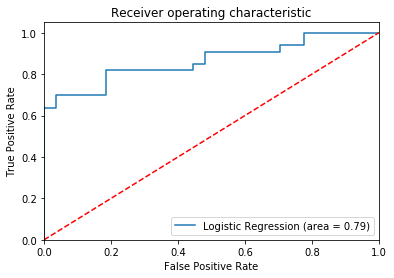

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The ROC curve is thus the sensitivity as a function of fall-out. In general, if the probability distributions for both detection and false alarm are known, the ROC curve can be generated by plotting the cumulative distribution function (area under the probability distribution from − ∞ {\displaystyle -\infty } to the discrimination threshold) of the detection probability in the y-axis versus the cumulative distribution function of the false-alarm probability on the x-axis. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

## Exploration of Exercise Induced Angina

C:\Users\Ankita & Subhash\AppData\Local\conda\conda\envs\analysis\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


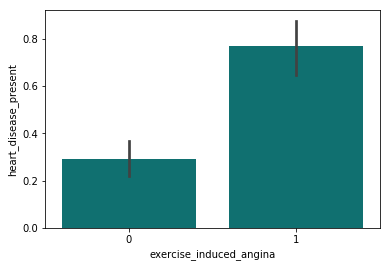

In [62]:
import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline

sns.barplot('exercise_induced_angina', 'heart_disease_present', data=heart_df, color="teal")
plt.show()

## Exploration of Chest Pain Type

C:\Users\Ankita & Subhash\AppData\Local\conda\conda\envs\analysis\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


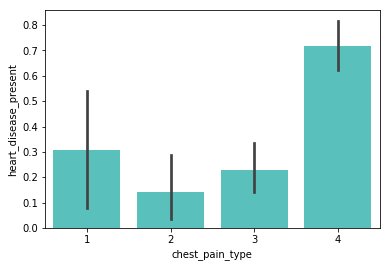

In [64]:
sns.barplot('chest_pain_type', 'heart_disease_present', data=heart_df, color="mediumturquoise")
plt.show()

## Exploration of Fasting Blood Sugar

C:\Users\Ankita & Subhash\AppData\Local\conda\conda\envs\analysis\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


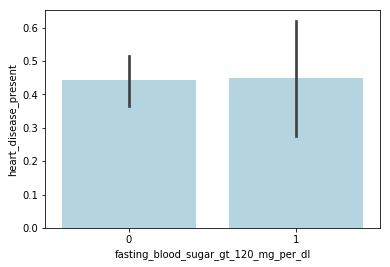

In [71]:
sns.barplot('fasting_blood_sugar_gt_120_mg_per_dl', 'heart_disease_present', data=heart_df, color="lightblue")
plt.show()

## 2. Feature Selection

### Recursive feature elimination
Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

cols = ['slope_of_peak_exercise_st_segment', 'resting_blood_pressure', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'chest_pain_type', 'num_major_vessels', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina'] 
X = heart_df[cols]
y = heart_df['heart_disease_present']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 11)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['slope_of_peak_exercise_st_segment', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'chest_pain_type', 'num_major_vessels', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina']


### Feature ranking with recursive feature elimination and cross-validation

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

Optimal number of features: 10
Selected features: ['slope_of_peak_exercise_st_segment', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'chest_pain_type', 'num_major_vessels', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina']


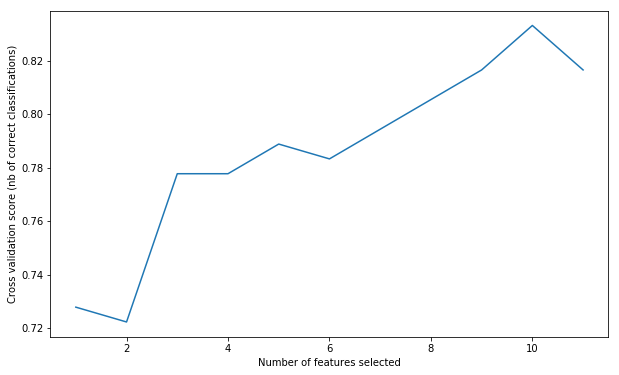

In [103]:
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Now, we had used 11 features, with which we build our Model. However from Feature Ranking we can see that the maximum Model   performance happens when the Model is fit with 10 Features selected. And it seems like serum_cholesterol_mg_per_dl does not significantly contribute to the Model's performance and hence it is dropped from the Model.

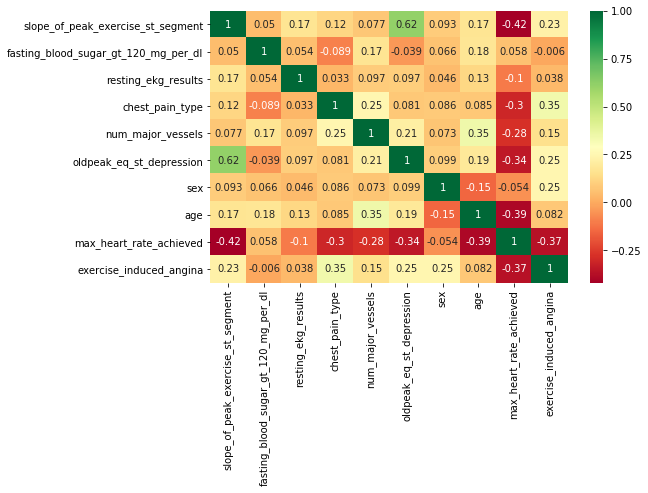

In [93]:
Selected_features = ['slope_of_peak_exercise_st_segment', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'chest_pain_type', 'num_major_vessels', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina']
X = heart_df[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

C:\Users\Ankita & Subhash\AppData\Local\conda\conda\envs\analysis\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train/Test split results:
LogisticRegression accuracy is 0.694
LogisticRegression log_loss is 0.720
LogisticRegression auc is 0.738


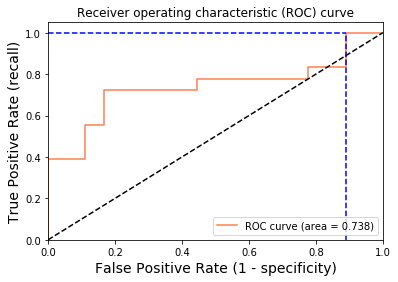

Using a threshold of 0.026 guarantees a sensitivity of 1.000 and a specificity of 0.111, i.e. a false positive rate of 88.89%.


In [94]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = heart_df[Selected_features]
y = heart_df['heart_disease_present']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

From the above ROC and the Logistic Regression Model using Feature Selection it looks like this time the Model accuracy has been reduced, as compared to the previous Model with ROC evaluation.

## 3. 10 Fold Cross Validation

In [102]:
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.817 (+/-0.061)
LogisticRegression average log_loss: 0.429 (+/-0.118)
LogisticRegression average auc: 0.881 (+/-0.066)


Okay, so now with 10 Fold Cross Validation, the Model Accuracy has increased to 83%. Next let's try to see the impact of adding "serum_cholesterol_mg_per_dl" to our Model and check the Model's performance.

In [101]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
cols = ['slope_of_peak_exercise_st_segment', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'chest_pain_type', 'num_major_vessels', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina']
X = heart_df[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, heart_df[cols], y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.817 (+/-0.061)
LogisticRegression average log_loss: 0.429 (+/-0.118)
LogisticRegression average auc: 0.881 (+/-0.066)


So seems like, on adding "serum_cholesterol_mg_per_dl" the performance of the 10 Fold Cross Validation's performance remains constant.  

## 4. Grid Search Using Multi scorers Simultaneously 

### GridSearchCV evaluating using multiple scorers, RepeatedStratifiedKFold and pipeline for preprocessing simultaneously

We can applied many tasks together for more in-depth evaluation like gridsearch using cross-validation based on k-folds repeated many times, that can be scaled or no with respect to many scorers and tunning on parameter for a given estimator!


best params: LogisticRegression(C=0.40001000000000003, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
best params: {'C': 0.40001000000000003}
best score: 0.8333333333333334


C:\Users\Ankita & Subhash\AppData\Local\conda\conda\envs\analysis\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


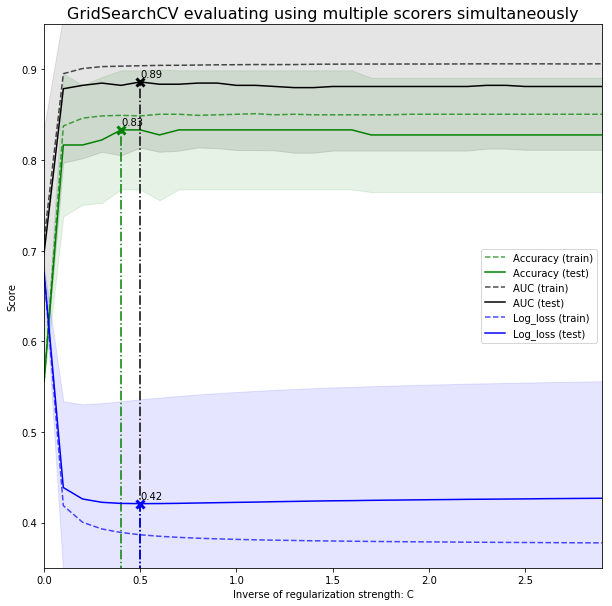

In [105]:
from sklearn.model_selection import GridSearchCV

X = heart_df[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

## Model Prediction

In [119]:
heart_df['heart_disease_present'] = logreg.predict(heart_df[Selected_features])
heart_df['patient_id'] = heart_df_test['patient_id']

evaluation = heart_df[['patient_id','heart_disease_present']]

evaluation.to_csv("evaluation.csv", index=False)

evaluation.tail()

evaluation.head(10)

,patient_id,heart_disease_present
0,olalu7,0
1,z9n6mx,0
2,5k4413,1
3,mrg7q5,0
4,uki4do,1
5,kev1sk,0
6,9n6let,1
7,jxmtyg,1
8,51s2ff,1
9,wi9mcs,0


So that's what our Model has predicted the presence or absence of the heart disease on the test_values file, and has written the predicted values in the evaluation.csv file. If we go back and view our test_values.csv file we would be able to see the patient_id against whose our Model has predicted the presence and the absence of the heart disease.